In [69]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import sqrt


In [105]:
rim_width = 1.2192 #4ft
rim_height = 2.64
cargo_radius = 0.2413/2

def flight_model(t, s):
    x, vx, y, vy = s
    dx = vx
    dvx = 0
    dy = vy
    dvy = -9.8
    return [dx, dvx, dy, dvy]

def hit_ground(t, s):
    x, vx, y, vy = s
    return y
hit_ground.terminal = True

def hit_rim(t, s):
    x, vx, y, vy = s
    dist_to_rim = min(x - -rim_width/2, -(y - rim_height)) #positive if cargo is down and to the right of closest rim
    return dist_to_rim + cargo_radius
hit_rim.terminal = True

def passed_rim(t, s):
    x, vx, y, vy = s
    return x - rim_width/2
passed_rim.terminal = True

undershot


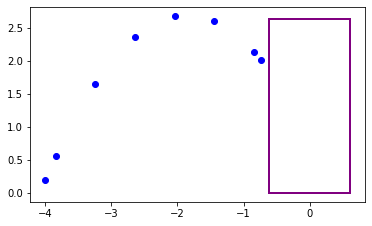

result: -1


In [142]:
def try_shot(s0, doShow):
    t_span = (0, 5.0)
    solution = solve_ivp(flight_model, t_span, s0, events=[hit_ground, hit_rim, passed_rim], max_step=0.2)

    result = 0 #default is success
    if(solution.y[0][-1] < -rim_width/2):
        result = -1 #undershot
    elif(solution.y[0][-1] > rim_width/2 - cargo_radius):
        result = 1 #overshot

    if doShow:

        if result == -1: print("undershot")
        elif result == 0: print("success")
        elif result == 1: print("overshot")

        plt.plot(solution.y[0, :], solution.y[2, :], 'bo')

        left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)
        rect=mpatches.Rectangle((left,bottom), width, height, fill=False, color="purple", linewidth=2)
        plt.gca().add_patch(rect)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return result

#s0 is [xpos, xvel, ypos, yvel]
print("result:", try_shot(s0=[-4, 3, 0.2, 7], doShow=True))


In [187]:
x_range = np.arange(-6, -1, 0.25)
vx_range = np.arange(1, 5, 0.25)
y_range = np.arange(0.2, 1.4, 0.2)
vy_range = np.arange(7, 15, 1)

everything = np.zeros((x_range.size, vx_range.size, y_range.size, vy_range.size))




for xi in range(x_range.size):
    for vxi in range(vx_range.size):
        for yi in range(y_range.size):
            for vyi in range(vy_range.size):
                everything[xi][vxi][yi][vyi] = try_shot(s0=[x_range[xi], vx_range[vxi], y_range[yi], vy_range[vyi]], doShow=False)
    print(xi)

print("done")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done


In [188]:
print(everything.shape)
print(10*14*6*8)

(20, 16, 6, 8)
6720


at x -3.0 and y 0.6000000000000001
[[-1. -1. -1. -1. -1. -1.  0.  0.]
 [-1. -1. -1. -1.  0.  0.  0.  0.]
 [-1. -1. -1.  0.  0.  0.  1.  1.]
 [-1. -1.  0.  0.  1.  1.  1.  1.]
 [-1.  0.  0.  1.  1.  1.  1.  1.]
 [-1.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]


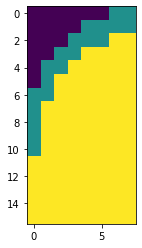

In [189]:
xi, yi = 12, 2
x, y = x_range[xi], y_range[yi]
print("at x", x, "and y", y)
print(everything[xi, :, yi, :])
plt.figure()
plt.imshow(everything[xi, :, yi, :])

# def avg(range_tuple):
#     return (range_tuple[0] + range_tuple[1]) * 0.5

# x = -4
# vx = 3
# y = 0.5
# vy = 8
# prev_result = 0

# #find the max x
# x = avg((x, x_range[1]))
# result = try_shot([x, vx, y, vy], doShow=False)
# if(result == -1):
#     x = avg((x, x_range[1]))
# elif(result == 0):
#     x = avg((x, x_range[1]))
# elif(result == 1):
#     x = avg((x, x_range[1]))


success


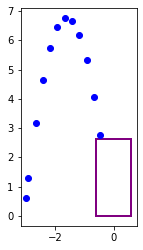

0

In [190]:
try_shot(s0=[-3, 1.25, 0.6, 11], doShow=True)